In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# 과소완전(undercomplete) 선형 오토인코더로 PCA 수행하기
- 제프리 힌튼 Discussion 에 의하면 Autoencoder 계층에서 선형 네트워크를 구축한다면, PCA 와 동일한 결과 값이 산출 된다.
- 선형 활성화 함수 사용
  - 
- 비용함수 : MSE

- undercomplete란 기저(basis)보다 적은 개수로 표현 되는 것을 의미한다.

In [ ]:
np.random.seed(2024)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

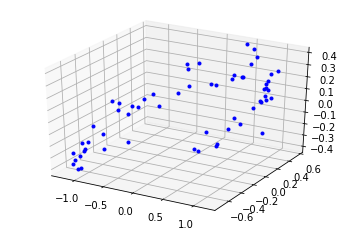

In [ ]:
fig = plt.figure()
#3D 좌표로 지정
ax = fig.gca(projection='3d')
plt.plot(X_train[:,0], X_train[:, 1], X_train[:, 2], "b.")
plt.grid(True)
plt.show()


- 3D 데이터셋에 PCA를 적용해 2D에 투영하는 간단한 선형 오토 인코더를 만들자
-  MLP 와 비슷하지만 다른점
    - encoder와 decoder 두개의 컴포넌트로 구성된다. 둘다 Dense Layer를 가진 Sequentual Model이다.
    - encoder 다음에 decoder가 와야 한다.
    - input.shape과 output.shape이 동일하다.
    - 단순 PCA를 수행하기 위해서는 활성화 함수를 사용하지 않는다.(모든 뉴런이 선형이다.)
    - Cost-function 은 MSE 이다.

In [ ]:
tf. random.set_seed(1234)
np. random.seed(1234)

In [ ]:
X_train.shape

(60, 3)

In [ ]:
encoder = keras.models.Sequential()
encoder.add(keras.layers.Dense(units = 2, input_shape=(3,)))

In [ ]:
decoder = keras.models.Sequential()
decoder.add(keras.layers.Dense(units = 3, input_shape=(2,)))

In [ ]:
autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
autoencoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 2)                 8         
                                                                 
 sequential_6 (Sequential)   (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss = "mse", optimizer = "SGD")

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs = 20)

Epoch 1/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2901
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2865
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2830
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2795
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2762
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2727
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2696
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2664
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2632
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2601
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2571
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2541
Epoch 13/20
2/2 [==============================] - 0s 6ms/step - loss: 0.

In [ ]:
codings = encoder.predict(X_train)

2/2 [==============================] - 0s 5ms/step


In [ ]:
codings.shape

(60, 2)

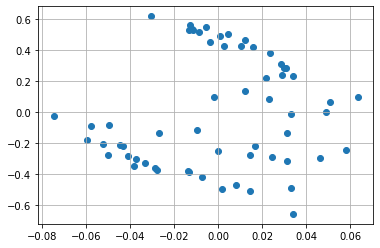

In [ ]:
fig = plt.figure()
#3D 좌표로 지정
plt.scatter(codings[:,0], codings[:, 1])
plt.grid(True)
plt.show()